# French car Project
The goal of this project is to create a predictive algorithm that can predict price based on the french market. It could be usefull to set a price on a new car based on the current situation of the market. The data comes from the french ADEME (Ecological Transition Agency) agency and is about new sold cars in France. The data represents all new models actually sold in the french market.
- [Data](#data)
- [Cleaning](#cleaning)
- [EDA](#eda)
- [Price Prediction Model Training](#prediction)
- [Prediction](#prediction1)

The files will be uploaded on github.
You can find the original data [here](https://data.ademe.fr/datasets/ademe-car-labelling).

## Packages

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

%matplotlib inline

## Options

In [2]:
pd.set_option('display.max_columns', None)

# Data <a id="data"></a>

In [3]:
response_API = requests.get('https://data.ademe.fr/data-fair/api/v1/datasets/ademe-car-labelling/full')
print(response_API.status_code)

200


In [4]:
data =response_API.text

In [5]:
data

'\ufeffMarque;"Libellé modèle";Modèle;Groupe;"Description Commerciale";Energie;Carrosserie;Cylindrée;Gamme;"Puissance fiscale";"Puissance maximale";"Puissance nominale électrique";"Poids à vide";"Rapport poids-puissance";"Type de boite";"Nombre rapports";"Conso basse vitesse Min";"Conso basse vitesse Max";"Conso moyenne vitesse Min";"Conso moyenne vitesse Max";"Conso haute vitesse Min";"Conso haute vitesse Max";"Conso T-haute vitesse Min";"Conso T-haute vitesse Max";"Conso vitesse mixte Min";"Conso vitesse mixte Max";"Conso elec Min";"Conso elec Max";"Autonomie elec Min";"Autonomie elec Max";"Autonomie elec urbain Min";"Autonomie elec urbain Max";"CO2 basse vitesse Min";"CO2 basse vitesse Max";"CO2 moyenne vitesse Min";"CO2 moyenne vitesse Max";"CO2 haute vitesse Min";"CO2 haute vitesse Max";"CO2 T-haute vitesse Min";"CO2 T-haute vitesse Max";"CO2 vitesse mixte Min";"CO2 vitesse mixte Max";"Essai CO2 type 1";"Essai HC";"Essai Nox";"Essai HCNox";"Essai particules";"Masse OM Min";"Masse 

In [6]:
#split lines
lines = data.split('\n')

In [7]:
#split cells
data = [line.split(';') for line in lines]

In [8]:
df = pd.DataFrame(data[1:], columns=data[0])

In [9]:
df.head()

,﻿Marque,"""Libellé modèle""",Modèle,Groupe,"""Description Commerciale""",Energie,Carrosserie,Cylindrée,Gamme,"""Puissance fiscale""","""Puissance maximale""","""Puissance nominale électrique""","""Poids à vide""","""Rapport poids-puissance""","""Type de boite""","""Nombre rapports""","""Conso basse vitesse Min""","""Conso basse vitesse Max""","""Conso moyenne vitesse Min""","""Conso moyenne vitesse Max""","""Conso haute vitesse Min""","""Conso haute vitesse Max""","""Conso T-haute vitesse Min""","""Conso T-haute vitesse Max""","""Conso vitesse mixte Min""","""Conso vitesse mixte Max""","""Conso elec Min""","""Conso elec Max""","""Autonomie elec Min""","""Autonomie elec Max""","""Autonomie elec urbain Min""","""Autonomie elec urbain Max""","""CO2 basse vitesse Min""","""CO2 basse vitesse Max""","""CO2 moyenne vitesse Min""","""CO2 moyenne vitesse Max""","""CO2 haute vitesse Min""","""CO2 haute vitesse Max""","""CO2 T-haute vitesse Min""","""CO2 T-haute vitesse Max""","""CO2 vitesse mixte Min""","""CO2 vitesse mixte Max""","""Essai CO2 type 1""","""Essai HC""","""Essai Nox""","""Essai HCNox""","""Essai particules""","""Masse OM Min""","""Masse OM Max""",Bonus-Malus,"""Barème Bonus-Malus""","""Prix véhicule"""
0,RENAULT,KANGOO,KANGOO,RENAULT,"""KANGOO (130ch)""",ESSENCE,COMBISPACE,1332,INFERIEURE,7,"96,000",,1519,"0,06",AUTOMATIQUE,7,"8,461","9,020","6,372","7,204","5,681","6,695","6,990","8,845","6,656","7,871",,,,,,,"191,87","204,52","144,41","163,26","128,69","151,70","158,44","200,55","150,86","178,42","0,234","0,012","0,022",,"0,001",1594,1594,Malus,1901,31000
1,MAZDA,MX-30,MX-30,AUTRES,"""MX-30 E-SKYACTIV (145ch)""",ELECTRIC,"""TS TERRAINS/CHEMINS""",0,INFERIEURE,6,,"80,900",1645,"0,01","""VARIATION ELECTRIQUE""",0,,,,,,,,,,,,"179,000",,"200,000",,"265,000",,,,,,,,,,,,,,,,1720,1720,"""Bonus 6000""",-6000,38510
2,DS,"""DS 7 CROSSBACK""","""7 CROSSBACK""",STELLANTIS,"""DS7 CROSSBACK e-tense 4x2 (225ch)""","""ELEC+ESSENC HR""","""TS TERRAINS/CHEMINS""",1598,"""MOYENNE SUPERIEURE""",10,"133,000","30,000",1760,"0,08",AUTOMATIQUE,8,,,,,,,,,"1,271","1,797","150,000","175,000","64,000","53,000","75,000","60,000",,,,,,,,,"28,71","40,60","0,460","0,015","0,016",,"0,001",1835,1835,"""Neutre 0""",,57560
3,RENAULT,AUSTRAL,AUSTRAL,RENAULT,"""AUSTRAL (130ch+0Kw)""","""ESS+ELEC HNR""","""TS TERRAINS/CHEMINS""",1199,"""MOYENNE SUPERIEURE""",7,"96,000","0,000",1421,"0,07",MECANIQUE,6,"6,121","7,040","4,820","5,220","4,688","4,980","5,758","6,153","5,286","5,719",,,,,,,"137,69","158,49","109,11","118,04","106,12","112,55","130,40","139,45","119,56","129,32","0,439","0,024","0,018",,"0,000",1496,1496,"""Neutre 0""",11900,33000
4,B.M.W.,"""SERIE 2""",218,AUTRES,"""218i Active Tourer""",ESSENCE,"""MONOSPACE COMPACT""",1499,"""MOYENNE INFERIEURE""",7,"100,000",,1470,"0,07",AUTOMATIQUE,7,"8,650","9,234","6,325","6,934","5,255","6,019","6,013","6,888","6,194","6,942",,,,,,,"197,01","210,29","143,98","157,81","119,57","136,95","136,88","156,77","141,00","158,00","0,204","0,007","0,009",,"0,000",1545,1545,Malus,400,36688


In [10]:
df.shape

(7680, 52)

In [11]:
df.columns

Index(['﻿Marque', '"Libellé modèle"', 'Modèle', 'Groupe',
       '"Description Commerciale"', 'Energie', 'Carrosserie', 'Cylindrée',
       'Gamme', '"Puissance fiscale"', '"Puissance maximale"',
       '"Puissance nominale électrique"', '"Poids à vide"',
       '"Rapport poids-puissance"', '"Type de boite"', '"Nombre rapports"',
       '"Conso basse vitesse Min"', '"Conso basse vitesse Max"',
       '"Conso moyenne vitesse Min"', '"Conso moyenne vitesse Max"',
       '"Conso haute vitesse Min"', '"Conso haute vitesse Max"',
       '"Conso T-haute vitesse Min"', '"Conso T-haute vitesse Max"',
       '"Conso vitesse mixte Min"', '"Conso vitesse mixte Max"',
       '"Conso elec Min"', '"Conso elec Max"', '"Autonomie elec Min"',
       '"Autonomie elec Max"', '"Autonomie elec urbain Min"',
       '"Autonomie elec urbain Max"', '"CO2 basse vitesse Min"',
       '"CO2 basse vitesse Max"', '"CO2 moyenne vitesse Min"',
       '"CO2 moyenne vitesse Max"', '"CO2 haute vitesse Min"',
       '"CO

## Cleaning <a id="cleaning"></a>

### Rename columns

In [12]:
old_column_names = ['Marque', '"Libellé modèle"', 'Modèle', 'Groupe',
       '"Description Commerciale"', 'Energie', 'Carrosserie', 'Cylindrée',
       'Gamme', '"Puissance fiscale"', '"Puissance maximale"',
       '"Puissance nominale électrique"', '"Poids à vide"',
       '"Rapport poids-puissance"', '"Type de boite"', '"Nombre rapports"',
       '"Conso basse vitesse Min"', '"Conso basse vitesse Max"',
       '"Conso moyenne vitesse Min"', '"Conso moyenne vitesse Max"',
       '"Conso haute vitesse Min"', '"Conso haute vitesse Max"',
       '"Conso T-haute vitesse Min"', '"Conso T-haute vitesse Max"',
       '"Conso vitesse mixte Min"', '"Conso vitesse mixte Max"',
       '"Conso elec Min"', '"Conso elec Max"', '"Autonomie elec Min"',
       '"Autonomie elec Max"', '"Autonomie elec urbain Min"',
       '"Autonomie elec urbain Max"', '"CO2 basse vitesse Min"',
       '"CO2 basse vitesse Max"', '"CO2 moyenne vitesse Min"',
       '"CO2 moyenne vitesse Max"', '"CO2 haute vitesse Min"',
       '"CO2 haute vitesse Max"', '"CO2 T-haute vitesse Min"',
       '"CO2 T-haute vitesse Max"', '"CO2 vitesse mixte Min"',
       '"CO2 vitesse mixte Max"', '"Essai CO2 type 1"', '"Essai HC"',
       '"Essai Nox"', '"Essai HCNox"', '"Essai particules"', '"Masse OM Min"',
       '"Masse OM Max"', 'Bonus-Malus', '"Barème Bonus-Malus"',
       '"Prix véhicule"']
#get ridd of ""
new_column_names = [i.replace('"', '') for i in old_column_names]
new_column_names = [i.replace(' ', '_') for i in new_column_names]
df.columns = new_column_names
df.columns

Index(['Marque', 'Libellé_modèle', 'Modèle', 'Groupe',
       'Description_Commerciale', 'Energie', 'Carrosserie', 'Cylindrée',
       'Gamme', 'Puissance_fiscale', 'Puissance_maximale',
       'Puissance_nominale_électrique', 'Poids_à_vide',
       'Rapport_poids-puissance', 'Type_de_boite', 'Nombre_rapports',
       'Conso_basse_vitesse_Min', 'Conso_basse_vitesse_Max',
       'Conso_moyenne_vitesse_Min', 'Conso_moyenne_vitesse_Max',
       'Conso_haute_vitesse_Min', 'Conso_haute_vitesse_Max',
       'Conso_T-haute_vitesse_Min', 'Conso_T-haute_vitesse_Max',
       'Conso_vitesse_mixte_Min', 'Conso_vitesse_mixte_Max', 'Conso_elec_Min',
       'Conso_elec_Max', 'Autonomie_elec_Min', 'Autonomie_elec_Max',
       'Autonomie_elec_urbain_Min', 'Autonomie_elec_urbain_Max',
       'CO2_basse_vitesse_Min', 'CO2_basse_vitesse_Max',
       'CO2_moyenne_vitesse_Min', 'CO2_moyenne_vitesse_Max',
       'CO2_haute_vitesse_Min', 'CO2_haute_vitesse_Max',
       'CO2_T-haute_vitesse_Min', 'CO2_T-haute_

## Drop useless Columns and last row

In [13]:
df.tail(2)

,Marque,Libellé_modèle,Modèle,Groupe,Description_Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance_fiscale,Puissance_maximale,Puissance_nominale_électrique,Poids_à_vide,Rapport_poids-puissance,Type_de_boite,Nombre_rapports,Conso_basse_vitesse_Min,Conso_basse_vitesse_Max,Conso_moyenne_vitesse_Min,Conso_moyenne_vitesse_Max,Conso_haute_vitesse_Min,Conso_haute_vitesse_Max,Conso_T-haute_vitesse_Min,Conso_T-haute_vitesse_Max,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,Conso_elec_Min,Conso_elec_Max,Autonomie_elec_Min,Autonomie_elec_Max,Autonomie_elec_urbain_Min,Autonomie_elec_urbain_Max,CO2_basse_vitesse_Min,CO2_basse_vitesse_Max,CO2_moyenne_vitesse_Min,CO2_moyenne_vitesse_Max,CO2_haute_vitesse_Min,CO2_haute_vitesse_Max,CO2_T-haute_vitesse_Min,CO2_T-haute_vitesse_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Bonus-Malus,Barème_Bonus-Malus,Prix_véhicule
7678,FORD,FIESTA,FIESTA,FORD,"""FIESTA 1.5 Ecoboost (200ch) S&S BVM6""",ESSENCE,BERLINE,1496,INFERIEURE,11,"147,000",,1205,"0,12",MECANIQUE,6,"8,139","8,685","5,725","6,421","5,205","5,876","6,432","6,985","6,137","6,755",,,,,,,"184,01","196,59","129,14","145,13","117,33","132,75","145,21","157,95","138,50","152,71","0,482","0,017","0,019",,"0,001",1280,1350,Malus,1074,27390
7679,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [14]:
#we can get rid of colum "Libellé modèle" because modèle is enough
#also "Description Commerciale"
df = df.drop("Libellé_modèle", axis = 1)
df = df.drop("Description_Commerciale", axis = 1)

In [15]:
#get rid of last row
df = df.drop(df.index[-1])

## NaN

In [16]:
column_to_check = df.columns
def check_NaN_percent(col, df):
    '''take the mean of NaN, multiply by 100 and print it with percent symbol'''
    for column_name in col:
        nan_percentage = (df[column_name].isna().mean()) * 100
        print(f"The percentage of NaN in the column {column_name} is : {nan_percentage:.2f}%")
check_NaN_percent(column_to_check, df)

The percentage of NaN in the column Marque is : 0.00%
The percentage of NaN in the column Modèle is : 0.00%
The percentage of NaN in the column Groupe is : 0.00%
The percentage of NaN in the column Energie is : 0.00%
The percentage of NaN in the column Carrosserie is : 0.00%
The percentage of NaN in the column Cylindrée is : 0.00%
The percentage of NaN in the column Gamme is : 0.00%
The percentage of NaN in the column Puissance_fiscale is : 0.00%
The percentage of NaN in the column Puissance_maximale is : 0.00%
The percentage of NaN in the column Puissance_nominale_électrique is : 0.00%
The percentage of NaN in the column Poids_à_vide is : 0.00%
The percentage of NaN in the column Rapport_poids-puissance is : 0.00%
The percentage of NaN in the column Type_de_boite is : 0.00%
The percentage of NaN in the column Nombre_rapports is : 0.00%
The percentage of NaN in the column Conso_basse_vitesse_Min is : 0.00%
The percentage of NaN in the column Conso_basse_vitesse_Max is : 0.00%
The perce

## Replace empty by value 0

In [17]:
df = df.replace('', 0)

In [18]:
column_to_check = df.columns
def check_0_percent(col, df):
    '''take the mean of NaN, multiply by 100 and print it with percent symbol'''
    for column_name in col:
        null_percentage = (df[column_name]== 0).sum()/df.shape[0]*100
        print(f"The percentage of NaN in the column {column_name} is : {null_percentage:.2f}%")
check_0_percent(column_to_check, df)

The percentage of NaN in the column Marque is : 0.00%
The percentage of NaN in the column Modèle is : 0.00%
The percentage of NaN in the column Groupe is : 0.00%
The percentage of NaN in the column Energie is : 0.00%
The percentage of NaN in the column Carrosserie is : 0.00%
The percentage of NaN in the column Cylindrée is : 0.00%
The percentage of NaN in the column Gamme is : 0.00%
The percentage of NaN in the column Puissance_fiscale is : 0.00%
The percentage of NaN in the column Puissance_maximale is : 3.50%
The percentage of NaN in the column Puissance_nominale_électrique is : 64.14%
The percentage of NaN in the column Poids_à_vide is : 0.00%
The percentage of NaN in the column Rapport_poids-puissance is : 0.00%
The percentage of NaN in the column Type_de_boite is : 0.00%
The percentage of NaN in the column Nombre_rapports is : 0.00%
The percentage of NaN in the column Conso_basse_vitesse_Min is : 12.88%
The percentage of NaN in the column Conso_basse_vitesse_Max is : 11.72%
The pe

In [19]:
#there is no NaN but a lot of 0 but it make sens for example an electric vehicule don't have Nox emission for example

## Convert numerical value into float

In [20]:
df.columns

Index(['Marque', 'Modèle', 'Groupe', 'Energie', 'Carrosserie', 'Cylindrée',
       'Gamme', 'Puissance_fiscale', 'Puissance_maximale',
       'Puissance_nominale_électrique', 'Poids_à_vide',
       'Rapport_poids-puissance', 'Type_de_boite', 'Nombre_rapports',
       'Conso_basse_vitesse_Min', 'Conso_basse_vitesse_Max',
       'Conso_moyenne_vitesse_Min', 'Conso_moyenne_vitesse_Max',
       'Conso_haute_vitesse_Min', 'Conso_haute_vitesse_Max',
       'Conso_T-haute_vitesse_Min', 'Conso_T-haute_vitesse_Max',
       'Conso_vitesse_mixte_Min', 'Conso_vitesse_mixte_Max', 'Conso_elec_Min',
       'Conso_elec_Max', 'Autonomie_elec_Min', 'Autonomie_elec_Max',
       'Autonomie_elec_urbain_Min', 'Autonomie_elec_urbain_Max',
       'CO2_basse_vitesse_Min', 'CO2_basse_vitesse_Max',
       'CO2_moyenne_vitesse_Min', 'CO2_moyenne_vitesse_Max',
       'CO2_haute_vitesse_Min', 'CO2_haute_vitesse_Max',
       'CO2_T-haute_vitesse_Min', 'CO2_T-haute_vitesse_Max',
       'CO2_vitesse_mixte_Min', 'CO2_v

In [21]:
df.head(1)

,Marque,Modèle,Groupe,Energie,Carrosserie,Cylindrée,Gamme,Puissance_fiscale,Puissance_maximale,Puissance_nominale_électrique,Poids_à_vide,Rapport_poids-puissance,Type_de_boite,Nombre_rapports,Conso_basse_vitesse_Min,Conso_basse_vitesse_Max,Conso_moyenne_vitesse_Min,Conso_moyenne_vitesse_Max,Conso_haute_vitesse_Min,Conso_haute_vitesse_Max,Conso_T-haute_vitesse_Min,Conso_T-haute_vitesse_Max,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,Conso_elec_Min,Conso_elec_Max,Autonomie_elec_Min,Autonomie_elec_Max,Autonomie_elec_urbain_Min,Autonomie_elec_urbain_Max,CO2_basse_vitesse_Min,CO2_basse_vitesse_Max,CO2_moyenne_vitesse_Min,CO2_moyenne_vitesse_Max,CO2_haute_vitesse_Min,CO2_haute_vitesse_Max,CO2_T-haute_vitesse_Min,CO2_T-haute_vitesse_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Bonus-Malus,Barème_Bonus-Malus,Prix_véhicule
0,RENAULT,KANGOO,RENAULT,ESSENCE,COMBISPACE,1332,INFERIEURE,7,"96,000",0,1519,"0,06",AUTOMATIQUE,7,"8,461","9,020","6,372","7,204","5,681","6,695","6,990","8,845","6,656","7,871",0,0,0,0,0,0,"191,87","204,52","144,41","163,26","128,69","151,70","158,44","200,55","150,86","178,42","0,234","0,012","0,022",0,"0,001",1594,1594,Malus,1901,31000


In [22]:
num = ['Cylindrée', 'Puissance_fiscale', 'Puissance_maximale',
       'Puissance_nominale_électrique', 'Poids_à_vide',
       'Rapport_poids-puissance', 'Nombre_rapports',
       'Conso_basse_vitesse_Min', 'Conso_basse_vitesse_Max',
       'Conso_moyenne_vitesse_Min', 'Conso_moyenne_vitesse_Max',
       'Conso_haute_vitesse_Min', 'Conso_haute_vitesse_Max',
       'Conso_T-haute_vitesse_Min', 'Conso_T-haute_vitesse_Max',
       'Conso_vitesse_mixte_Min', 'Conso_vitesse_mixte_Max', 'Conso_elec_Min',
       'Conso_elec_Max', 'Autonomie_elec_Min', 'Autonomie_elec_Max',
       'Autonomie_elec_urbain_Min', 'Autonomie_elec_urbain_Max',
       'CO2_basse_vitesse_Min', 'CO2_basse_vitesse_Max',
       'CO2_moyenne_vitesse_Min', 'CO2_moyenne_vitesse_Max',
       'CO2_haute_vitesse_Min', 'CO2_haute_vitesse_Max',
       'CO2_T-haute_vitesse_Min', 'CO2_T-haute_vitesse_Max',
       'CO2_vitesse_mixte_Min', 'CO2_vitesse_mixte_Max', 'Essai_CO2_type_1',
       'Essai_HC', 'Essai_Nox', 'Essai_HCNox', 'Essai_particules',
       'Masse_OM_Min', 'Masse_OM_Max', 'Barème_Bonus-Malus',
       'Prix_véhicule']

In [23]:
def type_values(col):
    for i in col:
            type_num = type(df[i].iloc[0])
            print(f"type of {i} is {type_num}")
type_values(num)

type of Cylindrée is <class 'str'>
type of Puissance_fiscale is <class 'str'>
type of Puissance_maximale is <class 'str'>
type of Puissance_nominale_électrique is <class 'int'>
type of Poids_à_vide is <class 'str'>
type of Rapport_poids-puissance is <class 'str'>
type of Nombre_rapports is <class 'str'>
type of Conso_basse_vitesse_Min is <class 'str'>
type of Conso_basse_vitesse_Max is <class 'str'>
type of Conso_moyenne_vitesse_Min is <class 'str'>
type of Conso_moyenne_vitesse_Max is <class 'str'>
type of Conso_haute_vitesse_Min is <class 'str'>
type of Conso_haute_vitesse_Max is <class 'str'>
type of Conso_T-haute_vitesse_Min is <class 'str'>
type of Conso_T-haute_vitesse_Max is <class 'str'>
type of Conso_vitesse_mixte_Min is <class 'str'>
type of Conso_vitesse_mixte_Max is <class 'str'>
type of Conso_elec_Min is <class 'int'>
type of Conso_elec_Max is <class 'int'>
type of Autonomie_elec_Min is <class 'int'>
type of Autonomie_elec_Max is <class 'int'>
type of Autonomie_elec_urbain

In [24]:
#convert to float
df[num] = df[num].astype(str)

In [25]:
for i in num:
    df[i] = df[i].str.replace(",",".")

In [26]:
df[num]

,Cylindrée,Puissance_fiscale,Puissance_maximale,Puissance_nominale_électrique,Poids_à_vide,Rapport_poids-puissance,Nombre_rapports,Conso_basse_vitesse_Min,Conso_basse_vitesse_Max,Conso_moyenne_vitesse_Min,Conso_moyenne_vitesse_Max,Conso_haute_vitesse_Min,Conso_haute_vitesse_Max,Conso_T-haute_vitesse_Min,Conso_T-haute_vitesse_Max,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,Conso_elec_Min,Conso_elec_Max,Autonomie_elec_Min,Autonomie_elec_Max,Autonomie_elec_urbain_Min,Autonomie_elec_urbain_Max,CO2_basse_vitesse_Min,CO2_basse_vitesse_Max,CO2_moyenne_vitesse_Min,CO2_moyenne_vitesse_Max,CO2_haute_vitesse_Min,CO2_haute_vitesse_Max,CO2_T-haute_vitesse_Min,CO2_T-haute_vitesse_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Barème_Bonus-Malus,Prix_véhicule
0,1332,7,96.000,0,1519,0.06,7,8.461,9.020,6.372,7.204,5.681,6.695,6.990,8.845,6.656,7.871,0,0,0,0,0,0,191.87,204.52,144.41,163.26,128.69,151.70,158.44,200.55,150.86,178.42,0.234,0.012,0.022,0,0.001,1594,1594,1901,31000
1,0,6,0,80.900,1645,0.01,0,0,0,0,0,0,0,0,0,0,0,0,179.000,0,200.000,0,265.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1720,1720,-6000,38510
2,1598,10,133.000,30.000,1760,0.08,8,0,0,0,0,0,0,0,0,1.271,1.797,150.000,175.000,64.000,53.000,75.000,60.000,0,0,0,0,0,0,0,0,28.71,40.60,0.460,0.015,0.016,0,0.001,1835,1835,0,57560
3,1199,7,96.000,0.000,1421,0.07,6,6.121,7.040,4.820,5.220,4.688,4.980,5.758,6.153,5.286,5.719,0,0,0,0,0,0,137.69,158.49,109.11,118.04,106.12,112.55,130.40,139.45,119.56,129.32,0.439,0.024,0.018,0,0.000,1496,1496,11900,33000
4,1499,7,100.000,0,1470,0.07,7,8.650,9.234,6.325,6.934,5.255,6.019,6.013,6.888,6.194,6.942,0,0,0,0,0,0,197.01,210.29,143.98,157.81,119.57,136.95,136.88,156.77,141.00,158.00,0.204,0.007,0.009,0,0.000,1545,1545,400,36688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,1950,10,140.000,0,2170,0.06,9,8.888,11.699,7.144,9.165,6.250,7.953,7.550,9.428,7.245,9.222,0,0,0,0,0,0,233.19,307.09,187.35,240.49,163.85,208.64,198.02,247.41,190.00,242.00,0.211,0,0.027,0.045,0.001,2245,2245,37597,74793
7675,998,6,88.300,7.940,1265,0.07,6,7.073,7.277,5.237,5.776,4.675,5.280,5.666,6.634,5.461,6.127,0,0,0,0,0,0,160.69,165.16,118.91,131.01,106.12,119.71,128.68,150.53,124.00,139.00,0.223,0.025,0.022,0,0.000,1340,1340,11911,26450
7676,1997,9,130.000,0,1607,0.08,8,6.500,7.374,5.589,6.291,4.866,5.573,5.714,6.821,5.532,6.402,0,0,0,0,0,0,170.37,193.32,146.48,164.91,127.50,146.06,149.76,178.81,144.98,167.82,0.101,0,0.030,0.041,0.000,1682,1682,0,47840
7677,1499,7,100.000,0,1320,0.08,7,8.092,8.676,5.516,6.400,4.693,5.896,5.435,7.138,5.577,6.809,0,0,0,0,0,0,184.61,197.89,125.72,145.84,106.89,134.31,123.87,162.71,127.10,155.20,0.273,0.023,0.015,0,0.000,1395,1395,125,37510


In [27]:
df[num] = df[num].astype(float)
df[num]

,Cylindrée,Puissance_fiscale,Puissance_maximale,Puissance_nominale_électrique,Poids_à_vide,Rapport_poids-puissance,Nombre_rapports,Conso_basse_vitesse_Min,Conso_basse_vitesse_Max,Conso_moyenne_vitesse_Min,Conso_moyenne_vitesse_Max,Conso_haute_vitesse_Min,Conso_haute_vitesse_Max,Conso_T-haute_vitesse_Min,Conso_T-haute_vitesse_Max,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,Conso_elec_Min,Conso_elec_Max,Autonomie_elec_Min,Autonomie_elec_Max,Autonomie_elec_urbain_Min,Autonomie_elec_urbain_Max,CO2_basse_vitesse_Min,CO2_basse_vitesse_Max,CO2_moyenne_vitesse_Min,CO2_moyenne_vitesse_Max,CO2_haute_vitesse_Min,CO2_haute_vitesse_Max,CO2_T-haute_vitesse_Min,CO2_T-haute_vitesse_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Barème_Bonus-Malus,Prix_véhicule
0,1332.0,7.0,96.0,0.00,1519.0,0.06,7.0,8.461,9.020,6.372,7.204,5.681,6.695,6.990,8.845,6.656,7.871,0.0,0.0,0.0,0.0,0.0,0.0,191.87,204.52,144.41,163.26,128.69,151.70,158.44,200.55,150.86,178.42,0.234,0.012,0.022,0.000,0.001,1594.0,1594.0,1901.0,31000.0
1,0.0,6.0,0.0,80.90,1645.0,0.01,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,179.0,0.0,200.0,0.0,265.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,1720.0,1720.0,-6000.0,38510.0
2,1598.0,10.0,133.0,30.00,1760.0,0.08,8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.271,1.797,150.0,175.0,64.0,53.0,75.0,60.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.71,40.60,0.460,0.015,0.016,0.000,0.001,1835.0,1835.0,0.0,57560.0
3,1199.0,7.0,96.0,0.00,1421.0,0.07,6.0,6.121,7.040,4.820,5.220,4.688,4.980,5.758,6.153,5.286,5.719,0.0,0.0,0.0,0.0,0.0,0.0,137.69,158.49,109.11,118.04,106.12,112.55,130.40,139.45,119.56,129.32,0.439,0.024,0.018,0.000,0.000,1496.0,1496.0,11900.0,33000.0
4,1499.0,7.0,100.0,0.00,1470.0,0.07,7.0,8.650,9.234,6.325,6.934,5.255,6.019,6.013,6.888,6.194,6.942,0.0,0.0,0.0,0.0,0.0,0.0,197.01,210.29,143.98,157.81,119.57,136.95,136.88,156.77,141.00,158.00,0.204,0.007,0.009,0.000,0.000,1545.0,1545.0,400.0,36688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674,1950.0,10.0,140.0,0.00,2170.0,0.06,9.0,8.888,11.699,7.144,9.165,6.250,7.953,7.550,9.428,7.245,9.222,0.0,0.0,0.0,0.0,0.0,0.0,233.19,307.09,187.35,240.49,163.85,208.64,198.02,247.41,190.00,242.00,0.211,0.000,0.027,0.045,0.001,2245.0,2245.0,37597.0,74793.0
7675,998.0,6.0,88.3,7.94,1265.0,0.07,6.0,7.073,7.277,5.237,5.776,4.675,5.280,5.666,6.634,5.461,6.127,0.0,0.0,0.0,0.0,0.0,0.0,160.69,165.16,118.91,131.01,106.12,119.71,128.68,150.53,124.00,139.00,0.223,0.025,0.022,0.000,0.000,1340.0,1340.0,11911.0,26450.0
7676,1997.0,9.0,130.0,0.00,1607.0,0.08,8.0,6.500,7.374,5.589,6.291,4.866,5.573,5.714,6.821,5.532,6.402,0.0,0.0,0.0,0.0,0.0,0.0,170.37,193.32,146.48,164.91,127.50,146.06,149.76,178.81,144.98,167.82,0.101,0.000,0.030,0.041,0.000,1682.0,1682.0,0.0,47840.0
7677,1499.0,7.0,100.0,0.00,1320.0,0.08,7.0,8.092,8.676,5.516,6.400,4.693,5.896,5.435,7.138,5.577,6.809,0.0,0.0,0.0,0.0,0.0,0.0,184.61,197.89,125.72,145.84,106.89,134.31,123.87,162.71,127.10,155.20,0.273,0.023,0.015,0.000,0.000,1395.0,1395.0,125.0,37510.0


## Catergorical values

In [28]:
df.columns

Index(['Marque', 'Modèle', 'Groupe', 'Energie', 'Carrosserie', 'Cylindrée',
       'Gamme', 'Puissance_fiscale', 'Puissance_maximale',
       'Puissance_nominale_électrique', 'Poids_à_vide',
       'Rapport_poids-puissance', 'Type_de_boite', 'Nombre_rapports',
       'Conso_basse_vitesse_Min', 'Conso_basse_vitesse_Max',
       'Conso_moyenne_vitesse_Min', 'Conso_moyenne_vitesse_Max',
       'Conso_haute_vitesse_Min', 'Conso_haute_vitesse_Max',
       'Conso_T-haute_vitesse_Min', 'Conso_T-haute_vitesse_Max',
       'Conso_vitesse_mixte_Min', 'Conso_vitesse_mixte_Max', 'Conso_elec_Min',
       'Conso_elec_Max', 'Autonomie_elec_Min', 'Autonomie_elec_Max',
       'Autonomie_elec_urbain_Min', 'Autonomie_elec_urbain_Max',
       'CO2_basse_vitesse_Min', 'CO2_basse_vitesse_Max',
       'CO2_moyenne_vitesse_Min', 'CO2_moyenne_vitesse_Max',
       'CO2_haute_vitesse_Min', 'CO2_haute_vitesse_Max',
       'CO2_T-haute_vitesse_Min', 'CO2_T-haute_vitesse_Max',
       'CO2_vitesse_mixte_Min', 'CO2_v

In [29]:
cat = [i for i in df.columns if i not in num]
cat

['Marque',
 'Modèle',
 'Groupe',
 'Energie',
 'Carrosserie',
 'Gamme',
 'Type_de_boite',
 'Bonus-Malus']

In [30]:
type_values(cat)

type of Marque is <class 'str'>
type of Modèle is <class 'str'>
type of Groupe is <class 'str'>
type of Energie is <class 'str'>
type of Carrosserie is <class 'str'>
type of Gamme is <class 'str'>
type of Type_de_boite is <class 'str'>
type of Bonus-Malus is <class 'str'>


## Duplicates

In [31]:
def duplicates(df = df):
    num_dup =df.duplicated().sum()
    perc = num_dup/df.shape[0]*100
    print(f"There are {num_dup} duplicates that's : {perc:.2f}% of values")

In [32]:
duplicates(df)

There are 2950 duplicates that's : 38.42% of values


In [33]:
df[df.duplicated(keep=False)].sort_values("Marque")

,Marque,Modèle,Groupe,Energie,Carrosserie,Cylindrée,Gamme,Puissance_fiscale,Puissance_maximale,Puissance_nominale_électrique,Poids_à_vide,Rapport_poids-puissance,Type_de_boite,Nombre_rapports,Conso_basse_vitesse_Min,Conso_basse_vitesse_Max,Conso_moyenne_vitesse_Min,Conso_moyenne_vitesse_Max,Conso_haute_vitesse_Min,Conso_haute_vitesse_Max,Conso_T-haute_vitesse_Min,Conso_T-haute_vitesse_Max,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,Conso_elec_Min,Conso_elec_Max,Autonomie_elec_Min,Autonomie_elec_Max,Autonomie_elec_urbain_Min,Autonomie_elec_urbain_Max,CO2_basse_vitesse_Min,CO2_basse_vitesse_Max,CO2_moyenne_vitesse_Min,CO2_moyenne_vitesse_Max,CO2_haute_vitesse_Min,CO2_haute_vitesse_Max,CO2_T-haute_vitesse_Min,CO2_T-haute_vitesse_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Bonus-Malus,Barème_Bonus-Malus,Prix_véhicule
4454,"""ALFA ROMEO""",GIULIA,STELLANTIS,GAZOLE,BERLINE,2143.0,SUPERIEURE,8.0,118.0,0.0,1465.0,0.08,AUTOMATIQUE,8.0,6.890,7.318,4.939,5.537,4.069,4.715,4.542,5.259,4.790,5.422,0.00,0.00,0.0,0.0,0.0,0.0,180.57,191.82,129.40,145.12,106.60,123.55,119.00,137.82,125.50,142.10,0.048,0.000,0.041,0.044,0.0,1570.0,1570.0,"""Neutre 0""",0.0,46350.0
5520,"""ALFA ROMEO""",GIULIA,STELLANTIS,GAZOLE,BERLINE,2143.0,SUPERIEURE,8.0,118.0,0.0,1465.0,0.08,AUTOMATIQUE,8.0,6.890,7.318,4.939,5.537,4.069,4.715,4.542,5.259,4.790,5.422,0.00,0.00,0.0,0.0,0.0,0.0,180.57,191.82,129.40,145.12,106.60,123.55,119.00,137.82,125.50,142.10,0.048,0.000,0.041,0.044,0.0,1570.0,1570.0,"""Neutre 0""",0.0,46350.0
5528,"""ALFA ROMEO""",GIULIA,STELLANTIS,GAZOLE,BERLINE,2143.0,SUPERIEURE,10.0,140.0,0.0,1465.0,0.10,AUTOMATIQUE,8.0,6.890,7.318,4.939,5.537,4.069,4.715,4.542,5.259,4.790,5.422,0.00,0.00,0.0,0.0,0.0,0.0,180.57,191.82,129.40,145.12,106.60,123.55,119.00,137.82,125.50,142.10,0.048,0.000,0.041,0.044,0.0,1570.0,1570.0,Malus,210.0,50883.0
6529,"""ALFA ROMEO""",GIULIA,STELLANTIS,GAZOLE,BERLINE,2143.0,SUPERIEURE,10.0,140.0,0.0,1465.0,0.10,AUTOMATIQUE,8.0,6.890,7.318,4.939,5.537,4.069,4.715,4.542,5.259,4.790,5.422,0.00,0.00,0.0,0.0,0.0,0.0,180.57,191.82,129.40,145.12,106.60,123.55,119.00,137.82,125.50,142.10,0.048,0.000,0.041,0.044,0.0,1570.0,1570.0,Malus,190.0,50883.0
7395,"""ALFA ROMEO""",GIULIA,STELLANTIS,GAZOLE,BERLINE,2143.0,SUPERIEURE,10.0,140.0,0.0,1465.0,0.10,AUTOMATIQUE,8.0,6.890,7.318,4.939,5.537,4.069,4.715,4.542,5.259,4.790,5.422,0.00,0.00,0.0,0.0,0.0,0.0,180.57,191.82,129.40,145.12,106.60,123.55,119.00,137.82,125.50,142.10,0.048,0.000,0.041,0.044,0.0,1570.0,1570.0,Malus,75.0,50883.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,VOLVO,XC60,GEELY,"""ELEC+ESSENC HR""","""TS TERRAINS/CHEMINS""",1969.0,SUPERIEURE,15.0,186.0,131.5,2075.0,0.09,AUTOMATIQUE,8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.941,1.334,187.15,212.36,80.0,68.0,96.0,86.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.36,30.29,0.243,0.008,0.008,0.000,0.0,2150.0,2150.0,"""Neutre 0""",0.0,76310.0
160,VOLVO,V90,GEELY,"""ELEC+ESSENC HR""",BREAK,1969.0,LUXE,20.0,228.0,99.0,2000.0,0.11,AUTOMATIQUE,8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.686,1.117,167.34,198.51,92.0,74.0,110.0,87.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.55,25.35,0.283,0.007,0.006,0.000,0.0,2075.0,2075.0,"""Neutre 0""",0.0,84167.0
3701,VOLVO,XC40,GEELY,"""ELEC+ESSENC HR""","""TS TERRAINS/CHEMINS""",1477.0,"""MOYENNE SUPERIEURE""",10.0,132.0,30.0,1737.0,0.08,AUTOMATIQUE,7.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.987,2.493,150.00,161.00,46.0,41.0,56.0,51.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.09,56.53,0.081,0.006,0.011,0.000,0.0,1812.0,1812.0,"""Neutre 0""",0.0,56400.0
502,VOLVO,XC40,GEELY,"""ELEC+ESSENC HR""","""TS TERRAINS/CHEMINS""",1477.0,"""MOYENNE SUPERIEURE""",7.0,95.0,30.0,1737.0,0.05,AUTOMATIQUE,7.0,0.000,0.000,0.000,0.000

In [34]:
df = df.drop_duplicates()

In [35]:
df.shape

(4729, 50)

## Values

In [36]:
#checking values of all columns
cat

['Marque',
 'Modèle',
 'Groupe',
 'Energie',
 'Carrosserie',
 'Gamme',
 'Type_de_boite',
 'Bonus-Malus']

In [37]:
df["Marque"].value_counts().sort_index()

Marque
"ALFA ROMEO"     91
"LAND ROVER"     37
"ROLLS ROYC"      2
ALPINE           15
AUDI             16
B.M.W.          865
BENTLEY           1
CITROEN         116
CUPRA            34
DACIA           107
DS               72
FERRARI          13
FIAT            144
FORD            211
HONDA            19
HYUNDAI          66
JAGUAR           43
JEEP             55
KIA             121
LAMBORGHIN        5
LEXUS            15
M.G.              8
MASERATI          3
MAZDA            40
MERCEDES        519
MINI            314
MITSUBISHI        4
NISSAN           48
OPEL            145
PEUGEOT         193
PORSCHE          77
RENAULT         430
SEAT             59
SKODA           259
SMART            14
SSANGYONG         3
SUBARU            2
SUZUKI           20
TESLA             4
TOYOTA           37
VOLKSWAGEN      387
VOLVO           115
Name: count, dtype: int64

In [38]:
df["Marque"] = df["Marque"].str.replace(".", "")
df["Marque"] = df["Marque"].str.replace('"', '')
df["Marque"] = df["Marque"].str.replace('ROLLS ROYC', 'ROLLS ROYCE')

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\2264075925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marque"] = df["Marque"].str.replace(".", "")
C:\Users\guill\AppData\Local\Temp\ipykernel_14380\2264075925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marque"] = df["Marque"].str.replace('"', '')
C:\Users\guill\AppData\Local\Temp\ipykernel_14380\2264075925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [39]:
pd.set_option('display.max_rows', None)
df["Modèle"].value_counts()

Modèle
COUNTRYMAN                     103
TIGUAN                          98
MINI                            98
X2                              93
CADDY                           84
420                             81
CLUBMAN                         78
MEGANE                          74
VITO                            74
TRAFIC                          70
KODIAQ                          66
"TOURNEO CONNECT"               65
KANGOO                          64
500                             63
218                             61
118                             59
X3                              57
220                             54
KAROQ                           54
"C 220"                         50
T-ROC                           49
X4                              48
STELVIO                         48
DUSTER                          46
XC40                            44
X5                              42
OCTAVIA                         42
KAMIQ                           41
"E 200"      

In [40]:
pd.set_option('display.max_rows', 20)
df["Modèle"] = df["Modèle"].str.replace('"', '')

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\869082877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Modèle"] = df["Modèle"].str.replace('"', '')


In [41]:
df["Groupe"] = df["Groupe"].str.replace(".", "")
df["Groupe"] = df["Groupe"].str.replace("VGF", "VOLKSWAGEN")

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\2104301031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Groupe"] = df["Groupe"].str.replace(".", "")
C:\Users\guill\AppData\Local\Temp\ipykernel_14380\2104301031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Groupe"] = df["Groupe"].str.replace("VGF", "VOLKSWAGEN")


In [42]:
a = df["Groupe"].value_counts()

In [43]:
df1 = df[df["Groupe"] == "AUTRES"]

In [44]:
df1["Marque"].value_counts()

Marque
BMW          865
MERCEDES     519
PEUGEOT      193
MAZDA         40
HONDA         19
FERRARI       13
MG             8
TESLA          4
SSANGYONG      3
SUBARU         2
Name: count, dtype: int64

In [45]:
for index, row in df.iterrows():
    if row['Groupe'] == "AUTRES":
        if row["Marque"] == "BMW":
            df.at[index, "Groupe"] = 'BMW'
        elif row["Marque"] == "MERCEDES":
            df.at[index, "Groupe"] = 'DAIMLER'
        elif row["Marque"] == "PEUGEOT":
            df.at[index, "Groupe"] = 'STELLANTIS'
        elif row["Marque"] == "MAZDA":
            df.at[index, "Groupe"] = 'TOYOTA'
        elif row["Marque"] == "HONDA":
            df.at[index, "Groupe"] = 'HONDA'
        elif row["Marque"] == "FERRARI":
            df.at[index, "Groupe"] = 'STELLANTIS'
        elif row["Marque"] == "MG":
            df.at[index, "Groupe"] = 'SAIC'
        elif row["Marque"] == "TESLA":
            df.at[index, "Groupe"] = 'TESLA'
        elif row["Marque"] == "SSANGYONG":
            df.at[index, "Groupe"] = 'SSANGYONG'
        elif row["Marque"] == "SUBARU":
            df.at[index, "Groupe"] = 'TOYOTA'


In [46]:
df["Groupe"].value_counts()

Groupe
BMW           1181
VOLKSWAGEN     838
STELLANTIS     832
RENAULT        552
DAIMLER        533
FORD           211
HYUNDAI        187
GEELY          115
TOYOTA          94
TATA            80
NISSAN          48
SUZUKI          20
HONDA           19
SAIC             8
MITSUBISHI       4
TESLA            4
SSANGYONG        3
Name: count, dtype: int64

In [47]:
cat

['Marque',
 'Modèle',
 'Groupe',
 'Energie',
 'Carrosserie',
 'Gamme',
 'Type_de_boite',
 'Bonus-Malus']

In [48]:
df.Energie.value_counts()
#HNR = hybrid non-rechargeable
#HR = Hybrid rechargeable

Energie
ESSENCE             1727
GAZOLE              1389
"GAZ+ELEC HNR"       582
"ESS+ELEC HNR"       563
ELECTRIC             223
"ELEC+ESSENC HR"     175
ESS+G.P.L.            51
"ELEC+GAZOLE HR"      10
SUPERETHANOL           7
"GAZ NAT.VEH"          2
Name: count, dtype: int64

In [49]:
df["Energie"] = df["Energie"].str.replace('"', '')

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\3503542615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Energie"] = df["Energie"].str.replace('"', '')


In [50]:
#let create a more simple column about Energie
def simplification_energie(energie):
    if energie in ['Essence', 'Diesel']:
        return 'ESSENCE'
    elif energie in ['GAZ+ELEC HNR', 'ESS+ELEC HNR', 'ELEC+ESSENC HR', "ELEC+GAZOLE HR"]:
        return 'HYBRIDE'
    elif energie in ['ESS+G.P.L.', 'SUPERETHANOL']:
        return 'GPL'
    else:
        return energie


df['Energie_simple'] = df['Energie'].apply(simplification_energie)


C:\Users\guill\AppData\Local\Temp\ipykernel_14380\665016646.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Energie_simple'] = df['Energie'].apply(simplification_energie)


In [51]:
df.Energie_simple.value_counts()

Energie_simple
ESSENCE        1727
GAZOLE         1389
HYBRIDE        1330
ELECTRIC        223
GPL              58
GAZ NAT.VEH       2
Name: count, dtype: int64

In [52]:
cat

['Marque',
 'Modèle',
 'Groupe',
 'Energie',
 'Carrosserie',
 'Gamme',
 'Type_de_boite',
 'Bonus-Malus']

In [53]:
df.Carrosserie.value_counts()

Carrosserie
"TS TERRAINS/CHEMINS"    1798
BERLINE                  1316
BREAK                     489
COMBISPACE                309
MINIBUS                   293
COUPE                     150
CABRIOLET                 139
"MONOSPACE COMPACT"       117
MONOSPACE                 110
MINISPACE                   8
Name: count, dtype: int64

In [54]:
df["Carrosserie"] = df["Carrosserie"].str.replace('"', '')

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\3033707557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Carrosserie"] = df["Carrosserie"].str.replace('"', '')


In [55]:
cat

['Marque',
 'Modèle',
 'Groupe',
 'Energie',
 'Carrosserie',
 'Gamme',
 'Type_de_boite',
 'Bonus-Malus']

In [56]:
df.Gamme.value_counts()

Gamme
INFERIEURE              1268
"MOYENNE INFERIEURE"    1114
"MOYENNE SUPERIEURE"    1030
SUPERIEURE               698
LUXE                     497
ECONOMIQUE               122
Name: count, dtype: int64

In [57]:
df["Carrosserie"] = df["Carrosserie"].str.replace('"', '')

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\3033707557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Carrosserie"] = df["Carrosserie"].str.replace('"', '')


In [58]:
df.Type_de_boite.value_counts()

Type_de_boite
AUTOMATIQUE               3097
MECANIQUE                 1306
"VARIATION ELECTRIQUE"     223
"VARIATION CONTINUE"       103
Name: count, dtype: int64

In [59]:
df["Type_de_boite"] = df["Type_de_boite"].str.replace('"', '')

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\2271273318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type_de_boite"] = df["Type_de_boite"].str.replace('"', '')


In [60]:
df["Bonus-Malus"].value_counts()

Bonus-Malus
Malus           3863
"Neutre 0"       641
"Bonus 4000"      69
"Bonus 6000"      68
"Bonus 1000"      42
"Bonus 2000"      30
AUTRES            16
Name: count, dtype: int64

In [61]:
df["Bonus-Malus"] = df["Bonus-Malus"].str.replace('"', '')

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\2229427221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bonus-Malus"] = df["Bonus-Malus"].str.replace('"', '')


In [62]:
#create a column Puissance that combine the Puissance_maximale and Puissance_nominale_électrique
df["Puissance"] = df["Puissance_maximale"]+ df["Puissance_nominale_électrique"]

C:\Users\guill\AppData\Local\Temp\ipykernel_14380\3890939904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Puissance"] = df["Puissance_maximale"]+ df["Puissance_nominale_électrique"]


# EDA <a id="eda"></a>

In [63]:
df.describe()

,Cylindrée,Puissance_fiscale,Puissance_maximale,Puissance_nominale_électrique,Poids_à_vide,Rapport_poids-puissance,Nombre_rapports,Conso_basse_vitesse_Min,Conso_basse_vitesse_Max,Conso_moyenne_vitesse_Min,Conso_moyenne_vitesse_Max,Conso_haute_vitesse_Min,Conso_haute_vitesse_Max,Conso_T-haute_vitesse_Min,Conso_T-haute_vitesse_Max,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,Conso_elec_Min,Conso_elec_Max,Autonomie_elec_Min,Autonomie_elec_Max,Autonomie_elec_urbain_Min,Autonomie_elec_urbain_Max,CO2_basse_vitesse_Min,CO2_basse_vitesse_Max,CO2_moyenne_vitesse_Min,CO2_moyenne_vitesse_Max,CO2_haute_vitesse_Min,CO2_haute_vitesse_Max,CO2_T-haute_vitesse_Min,CO2_T-haute_vitesse_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Barème_Bonus-Malus,Prix_véhicule,Puissance
count,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.00000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4.729000e+03,4729.000000
mean,1717.628040,10.007401,124.358871,7.145756,1567.211673,0.078651,6.643899,6.985935,7.789824,5.204774,6.021666,4.568999,5.391814,5.403373,6.494318,5.362761,6.308241,12.568598,17.007598,16.370163,17.417319,21.019158,22.553034,168.601582,188.108763,125.829095,145.649738,110.410641,130.387632,130.607659,157.06454,129.550837,152.447460,0.174849,0.012460,0.023002,0.020184,0.000192,1642.372172,1650.945020,5931.288010,4.933146e+04,131.504627
std,709.671269,7.803378,69.629736,20.843698,315.781913,0.036583,2.004559,3.080191,3.382522,2.070402,2.297288,1.779108,2.004716,2.077723,2.361973,1.982398,2.160329,46.798259,57.051675,75.804014,72.555428,97.819466,94.988101,72.352861,80.243806,49.548530,55.642969,42.576299,48.633771,49.861012,57.66429,47.289996,52.457061,0.147056,0.013172,0.013181,0.026025,0.000438,315.767138,323.296363,9020.940121,4.435302e+04,69.507638
min,0.000000,1.000000,0.000000,0.000000,840.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,915.000000,915.000000,-6000.000000,0.000000e+00,18.600000
25%,1368.000000,6.000000,90.000000,0.000000,1336.000000,0.060000,6.000000,6.230000,6.812000,4.829000,5.461000,4.312000,4.995000,5.052000,6.008000,4.969000,5.747000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.360000,167.980000,119.360000,135.300000,105.750000,121.170000,124.270000,147.92000,123.400000,140.900000,0.054000,0.000000,0.013000,0.000000,0.000000,1411.000000,1418.000000,190.000000,3.291300e+04,96.000000
50%,1598.000000,8.000000,110.000000,0.000000,1521.000000,0.070000,7.000000,7.331000,7.921000,5.516000,6.214000,4.851000,5.586000,5.726000,6.784000,5.644000,6.447000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.610000,190.680000,131.700000,148.730000,115.860000,134.010000,137.400000,160.27000,134.000000,154.000000,0.146000,0.012000,0.021000,0.000000,0.000000,1596.000000,1596.000000,1172.000000,4.135000e+04,110.000000
75%,1995.000000,10.000000,140.000000,0.000000,1760.000000,0.090000,8.000000,8.377000,9.108000,6.274000,7.043000,5.509000,6.241000,6.585000,7.550000,6.451000,7.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.560000,218.160000,147.970000,167.420000,129.760000,148.540000,154.410000,179.17000,151.100000,171.800000,0.247000,0.022000,0.031000,0.043000,0.000000,1835.000000,1840.000000,11912.000000,5.687300e+04,146.900000
max,6749.000000,91.000000,607.000000,200.000000,2

## Distribution

In [64]:
num.append("Puissance")

In [65]:
cat.append("Energie_simple")

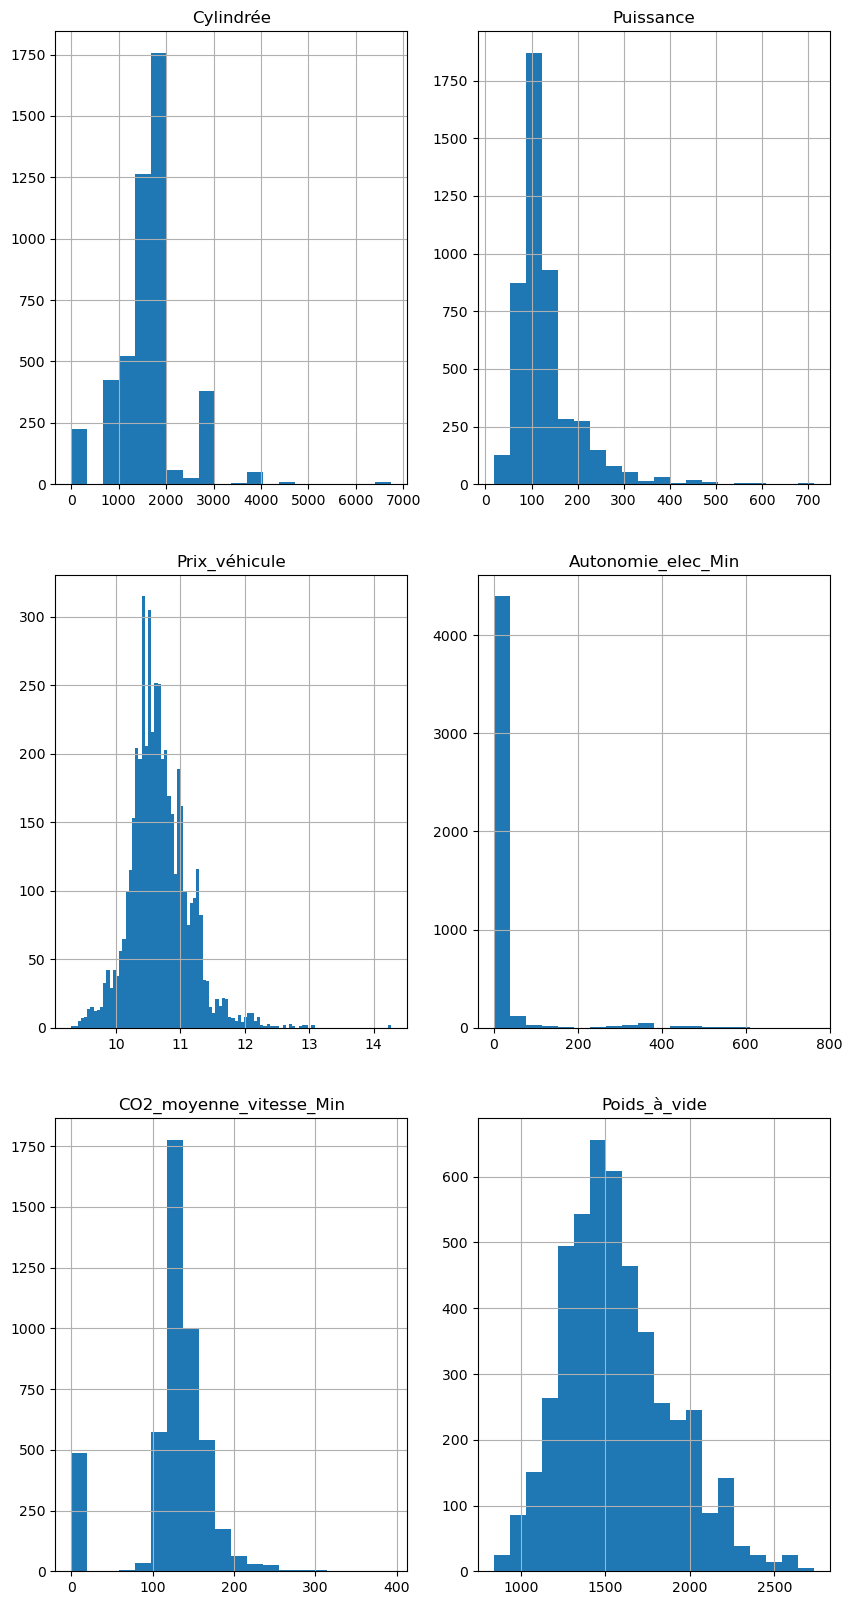

In [98]:
plt.figure(figsize = [10, 20]) 
bins = 20

plt.subplot(3, 2, 1) 
#bins = np.arange(0, df['Cylindrée'].max()+4, 4)
df["Cylindrée"].hist(bins = bins)
plt.title("Cylindrée");

plt.subplot(3, 2, 2)
#bins = np.arange(0,  df['Puissance'].max()+4, 4)
df["Puissance"].hist(bins = bins)
plt.title("Puissance");

plt.subplot(3, 2, 3) 
#bins = np.arange(0,  df['Prix_véhicule'].max()+8, 8)
df["Prix_véhicule"].hist(bins = 100)
plt.title("Prix_véhicule")
plt.savefig('Price.png', format='png');

plt.subplot(3, 2, 4) 
#bins = np.arange(0, df['Autonomie_elec_Min'].max()+4, 4)
df["Autonomie_elec_Min"].hist(bins = bins)
plt.title("Autonomie_elec_Min");

plt.subplot(3, 2, 5)
#bins = np.arange(0,  df['CO2_moyenne_vitesse_Min'].max()+4, 4)
df["CO2_moyenne_vitesse_Min"].hist(bins = bins)
plt.title("CO2_moyenne_vitesse_Min");

plt.subplot(3, 2, 6) 
#bins = np.arange(0,  df['Poids_à_vide'].max()+8, 8)
df["Poids_à_vide"].hist(bins = bins)
plt.title("Poids_à_vide");


In [67]:
cat

['Marque',
 'Modèle',
 'Groupe',
 'Energie',
 'Carrosserie',
 'Gamme',
 'Type_de_boite',
 'Bonus-Malus',
 'Energie_simple']

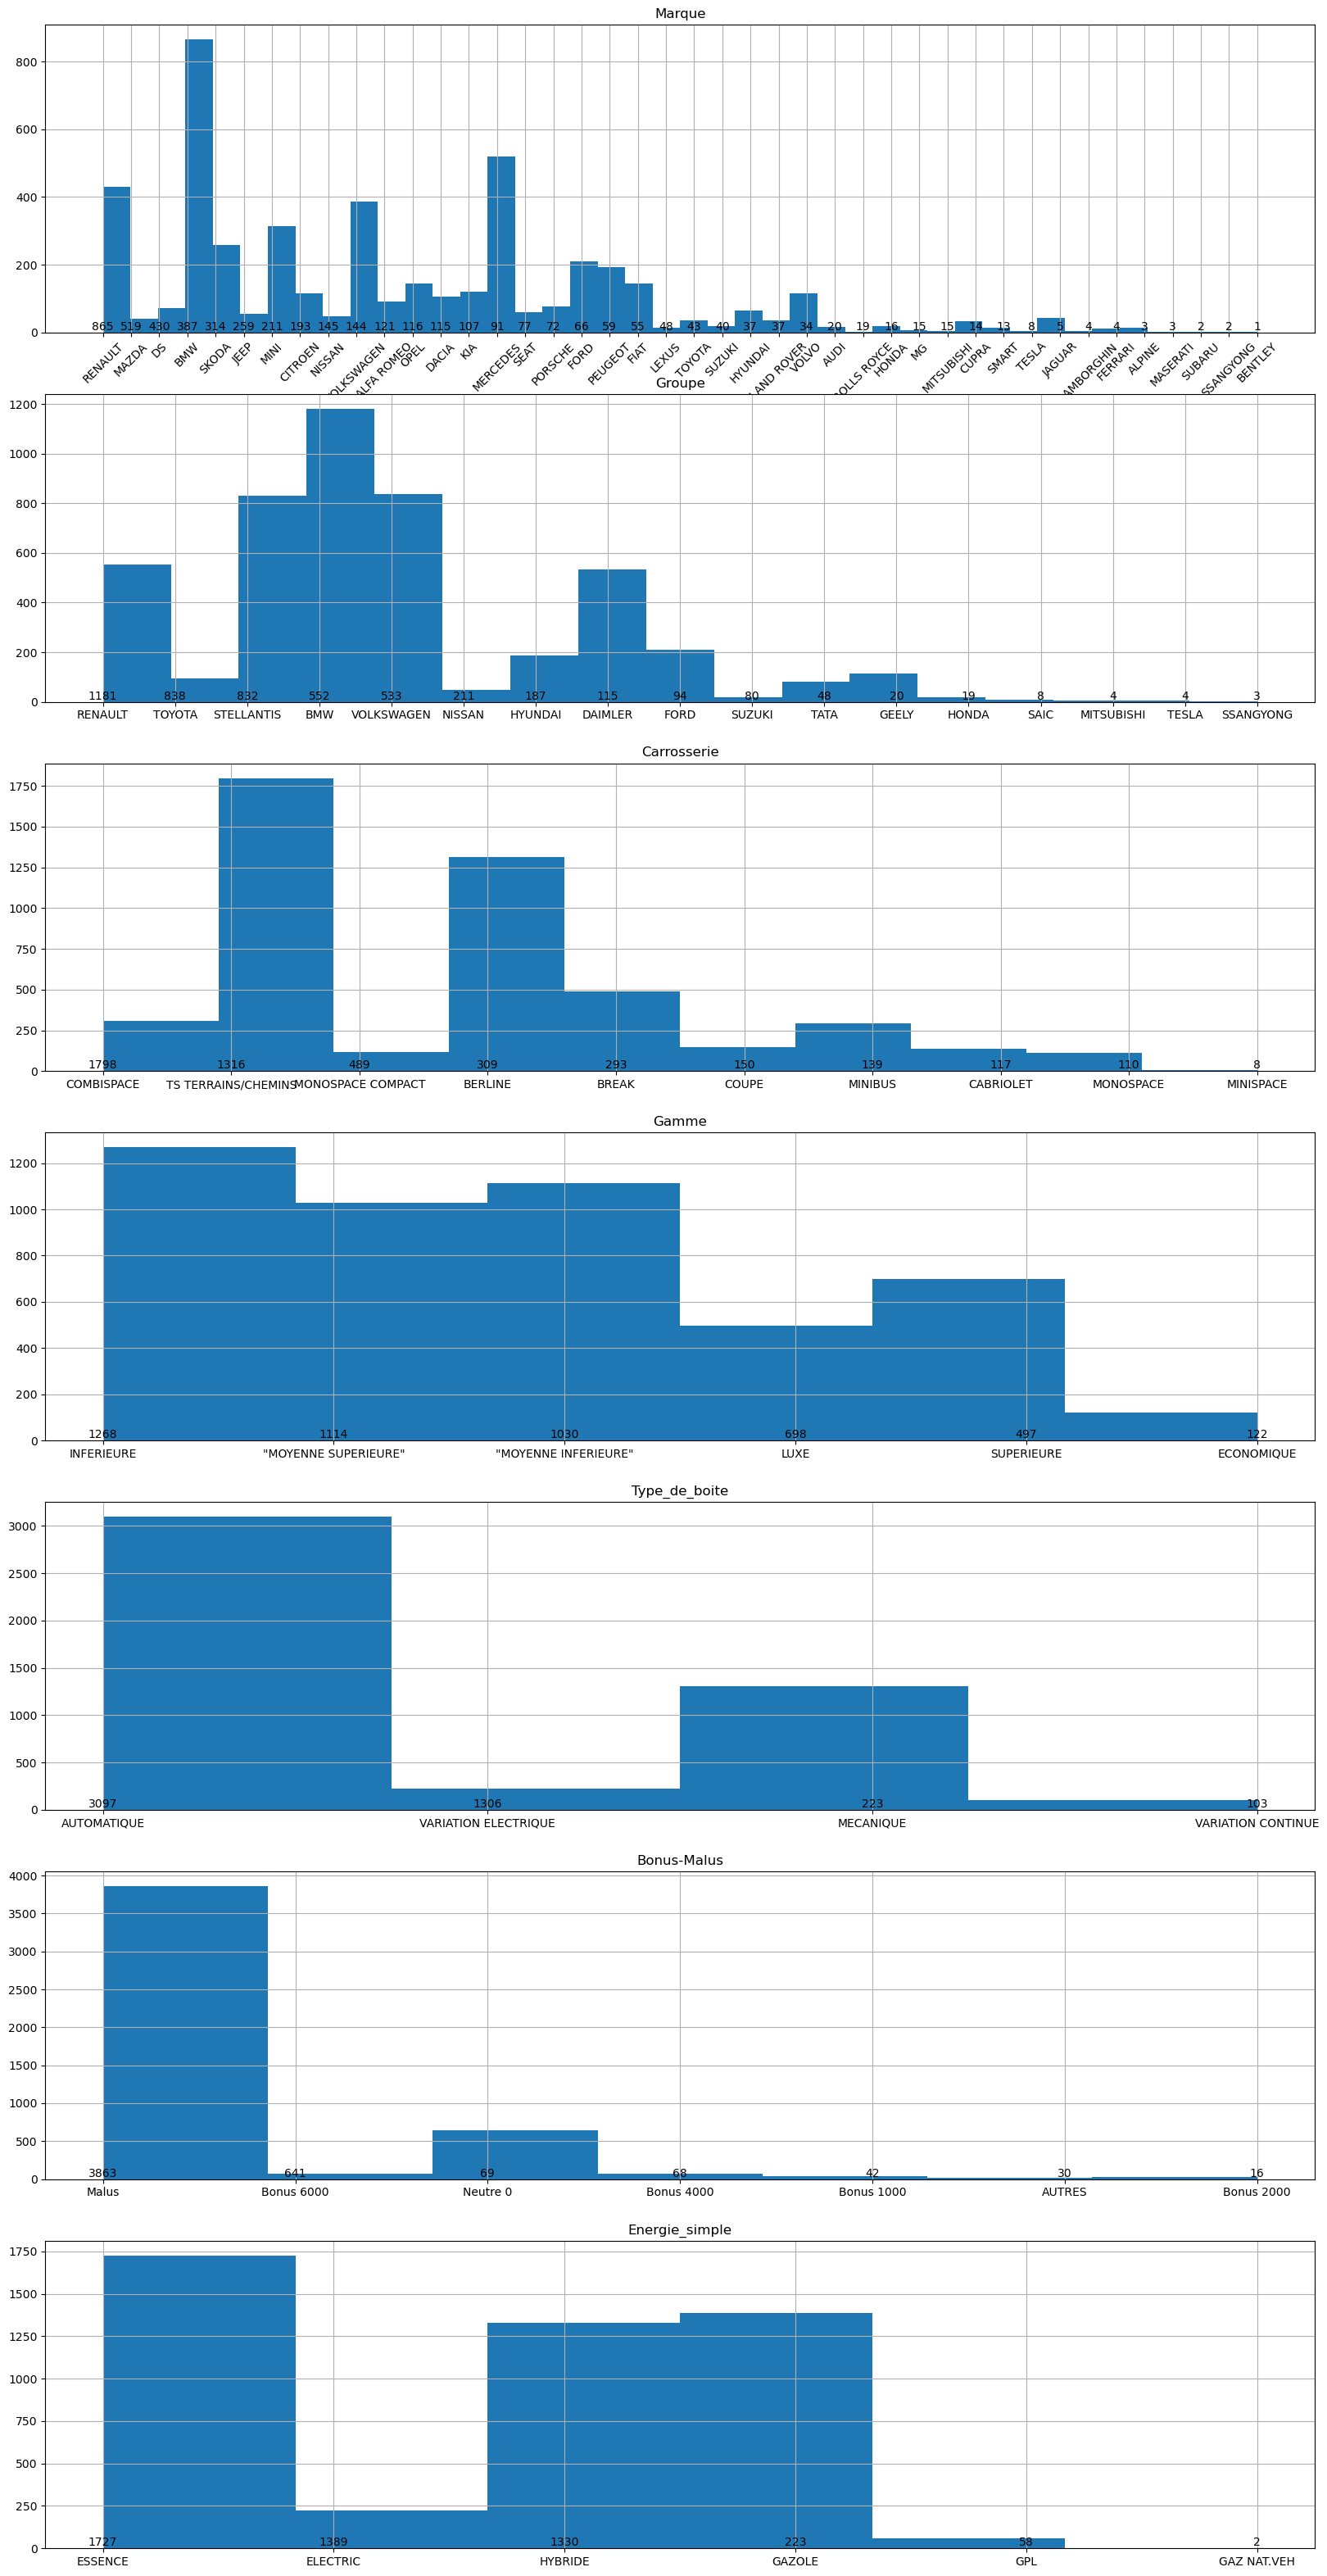

In [68]:
plt.figure(figsize = [20, 40]) 

plt.subplot(7, 1, 1) 
df["Marque"].hist(bins = df["Marque"].nunique())
plt.title("Marque")
value_counts = df["Marque"].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, -0.1, str(count), ha='center', va='bottom')
plt.xticks(rotation=45);

plt.subplot(7, 1, 2) 
df["Groupe"].hist(bins = df["Groupe"].nunique())
value_counts = df["Groupe"].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, -0.1, str(count), ha='center', va='bottom')
plt.title("Groupe");

plt.subplot(7, 1, 3) 
df["Carrosserie"].hist(bins = df["Carrosserie"].nunique())
value_counts = df["Carrosserie"].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, -0.1, str(count), ha='center', va='bottom')
plt.title("Carrosserie");

plt.subplot(7, 1, 4) 
df["Gamme"].hist(bins = df["Gamme"].nunique())
value_counts = df["Gamme"].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, -0.1, str(count), ha='center', va='bottom')
plt.title("Gamme");

plt.subplot(7, 1, 5) 
df["Type_de_boite"].hist(bins = df["Type_de_boite"].nunique())
value_counts = df["Type_de_boite"].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, -0.1, str(count), ha='center', va='bottom')
plt.title("Type_de_boite");

plt.subplot(7, 1, 6) 
df["Bonus-Malus"].hist(bins = df["Bonus-Malus"].nunique())
value_counts = df["Bonus-Malus"].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, -0.1, str(count), ha='center', va='bottom')
plt.title("Bonus-Malus");

plt.subplot(7, 1, 7) 
df["Energie_simple"].hist(bins = df["Energie_simple"].nunique())
value_counts = df["Energie_simple"].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, -0.1, str(count), ha='center', va='bottom')
plt.title("Energie_simple");

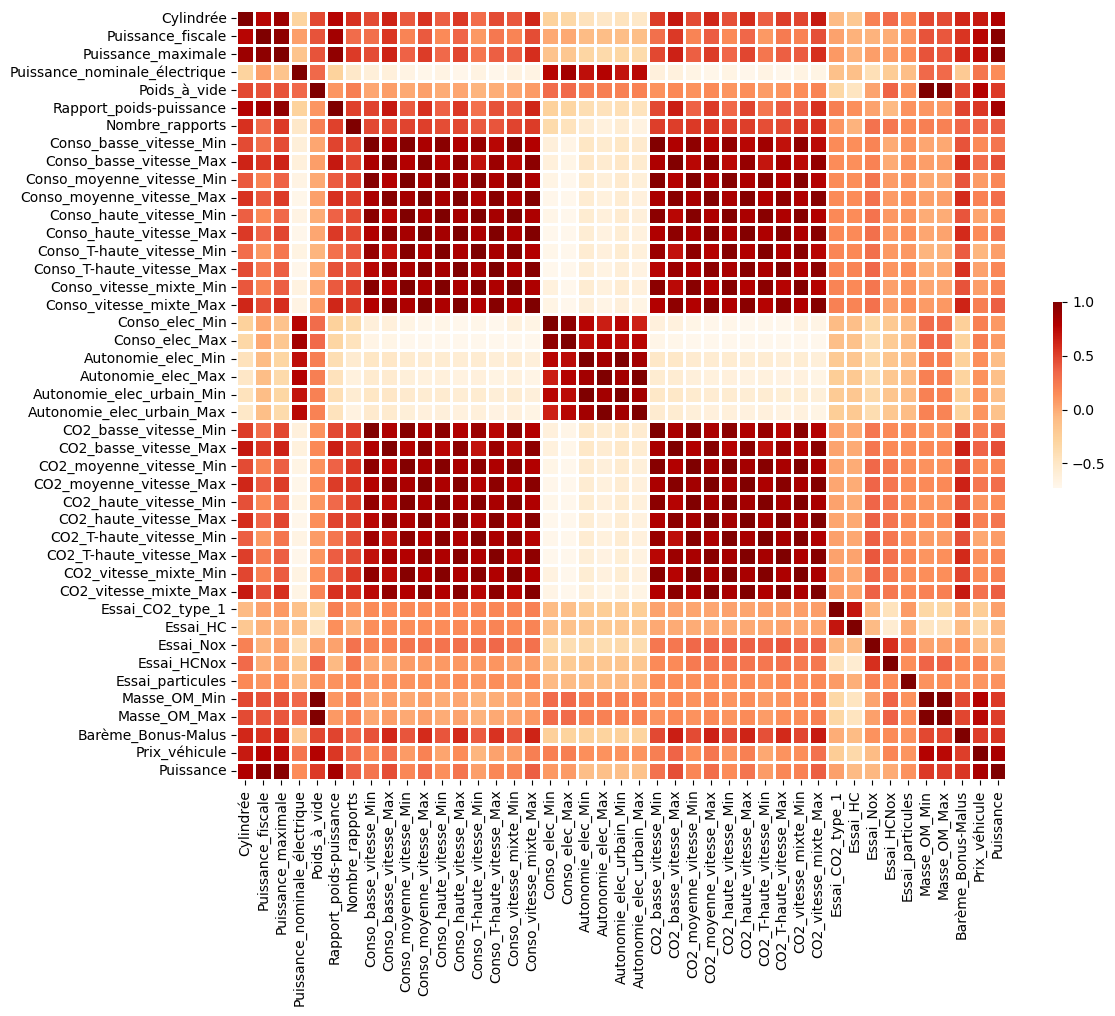

In [99]:
# Calc correlation matrix
corr_mat = df[num].corr()

# Set plot size
plt.subplots(figsize=(12,10))

# Plot heatmap
sb.heatmap(corr_mat, 
            square=True, 
            robust=True, 
            cmap='OrRd', # use orange/red colour map
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1) # space between cells
plt.savefig('matrix.png', format='png')

As we want to predict and not measure explanatory's variables effect on explained variable, multicolinearity isn't a problem

# Price Prediction Model Training<a id="prediction"></a>

I want to predict the price based on all other columns. For this task I'll use an Ensemble method. An Ensemble method are based on a weighted average of several machine learning algorithms. As my price is a continuous value the ensemble method will be based on regression algorithms.

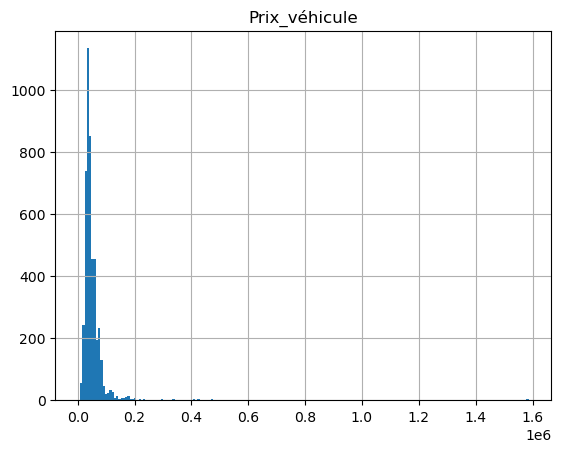

In [70]:
#As the Price is the output we must search for outlier and check that the distribution is normal
df["Prix_véhicule"].hist(bins = 200)
plt.title("Prix_véhicule");

In [71]:
df[df["Prix_véhicule"] > 300000]

,Marque,Modèle,Groupe,Energie,Carrosserie,Cylindrée,Gamme,Puissance_fiscale,Puissance_maximale,Puissance_nominale_électrique,Poids_à_vide,Rapport_poids-puissance,Type_de_boite,Nombre_rapports,Conso_basse_vitesse_Min,Conso_basse_vitesse_Max,Conso_moyenne_vitesse_Min,Conso_moyenne_vitesse_Max,Conso_haute_vitesse_Min,Conso_haute_vitesse_Max,Conso_T-haute_vitesse_Min,Conso_T-haute_vitesse_Max,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,Conso_elec_Min,Conso_elec_Max,Autonomie_elec_Min,Autonomie_elec_Max,Autonomie_elec_urbain_Min,Autonomie_elec_urbain_Max,CO2_basse_vitesse_Min,CO2_basse_vitesse_Max,CO2_moyenne_vitesse_Min,CO2_moyenne_vitesse_Max,CO2_haute_vitesse_Min,CO2_haute_vitesse_Max,CO2_T-haute_vitesse_Min,CO2_T-haute_vitesse_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Bonus-Malus,Barème_Bonus-Malus,Prix_véhicule,Energie_simple,Puissance
205,ROLLS ROYCE,CULLINAN,BMW,ESSENCE,TS TERRAINS/CHEMINS,6749.0,LUXE,53.0,441.0,0.0,2710.0,0.16,AUTOMATIQUE,8.0,28.294,28.726,17.275,17.808,13.466,13.798,13.879,14.015,16.363,16.680,0.0,0.0,0.0,0.0,0.0,0.0,645.11,654.94,393.78,405.93,306.93,314.46,316.34,319.41,373.0,380.2,0.116,0.015,0.003,0.0,0.000,2785.0,2785.0,Malus,40000.0,391800.0,ESSENCE,441.0
854,LAMBORGHIN,AVENTADOR,VOLKSWAGEN,ESSENCE,CABRIOLET,6498.0,LUXE,83.0,574.0,0.0,1715.0,0.33,AUTOMATIQUE,7.0,0.000,33.700,0.000,19.100,0.000,15.000,0.000,14.000,0.000,18.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,825.00,0.00,472.00,0.00,369.00,0.00,345.00,0.0,442.0,0.000,0.000,0.000,0.0,0.000,1790.0,1790.0,Malus,40000.0,350000.0,ESSENCE,574.0
1496,FORD,GT,FORD,ESSENCE,COUPE,3496.0,LUXE,58.0,463.0,0.0,1523.0,0.30,AUTOMATIQUE,7.0,0.000,25.200,0.000,14.700,0.000,11.400,0.000,11.000,0.000,13.700,0.0,0.0,0.0,0.0,0.0,0.0,0.00,578.32,0.00,336.64,0.00,260.35,0.00,251.24,0.0,315.0,0.428,0.025,0.025,0.0,0.000,1598.0,1629.0,Malus,40000.0,405397.0,ESSENCE,463.0
2209,LAMBORGHIN,AVENTADOR,VOLKSWAGEN,ESSENCE,COUPE,6498.0,LUXE,81.0,566.0,0.0,1640.0,0.35,AUTOMATIQUE,7.0,0.000,32.200,0.000,18.900,0.000,14.900,0.000,14.900,0.000,18.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,798.00,0.00,470.00,0.00,370.00,0.00,370.00,0.0,448.0,0.000,0.000,0.000,0.0,0.000,1715.0,1715.0,Malus,40000.0,337865.0,ESSENCE,566.0
2454,LAMBORGHIN,AVENTADOR,VOLKSWAGEN,ESSENCE,COUPE,6498.0,LUXE,83.0,574.0,0.0,1665.0,0.34,AUTOMATIQUE,7.0,0.000,33.700,0.000,19.100,0.000,15.000,0.000,14.000,0.000,18.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,825.00,0.00,472.00,0.00,369.00,0.00,345.00,0.0,442.0,0.000,0.000,0.000,0.0,0.000,1740.0,1740.0,Malus,40000.0,337865.0,ESSENCE,574.0
2655,ROLLS ROYCE,DAWN,BMW,ESSENCE,CABRIOLET,6592.0,LUXE,53.0,441.0,0.0,2630.0,0.17,AUTOMATIQUE,8.0,29.497,30.332,16.458,17.401,13.101,13.311,12.462,12.823,15.741,16.238,0.0,0.0,0.0,0.0,0.0,0.0,672.02,691.05,374.64,396.14,298.09,302.85,283.52,291.71,358.3,369.6,0.407,0.033,0.016,0.0,0.001,2705.0,2705.0,Malus,40000.0,411990.0,ESSENCE,441.0
2771,FERRARI,MONZA,STELLANTIS,ESSENCE,CABRIOLET,6496.0,LUXE,87.0,592.0,0.0,1631.0,0.36,MECANIQUE,7.0,0.000,25.500,0.000,15.600,0.000,13.800,0.000,15.000,0.000,16.100,0.0,0.0,0.0,0.0,0.0,0.0,0.00,578.00,0.00,354.00,0.00,313.00,0.00,340.00,0.0,366.0,0.427,0.037,0.026,0.0,0.001,1706.0,1706.0,Malus,40000.0,1586530.0,ESSENCE,592.0
4166,FERRARI,MONZA,STELLANTIS,ESSENCE,CABRIOLET,6496.0,LUXE,87.0,592.0,0.0,1610.0,0.37,MECANIQUE,7.0,0.000,25.500,0.000,15.600,0.000,13.800,0.000,15.000,0.000,16.100,0.0,0.0,0.0,0.0,0.0,0.0,0.00,578.00,0.00,354.00,0.00,313.00,0.00,340.00,0.0,366.0,0.427,0.037,0.026,0.0,0.001,1685.0,1685.0,Malus,40000.0,1586530.0,ESSENCE,592.0
4887,FERRARI,SF90,STELLANTIS,ELEC+ESSENC HR,COUPE,3990.0,LUXE,83.0,574.0,139.0,1745.0,0.33,MECANIQUE,8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,0.0,120.0,0.0,19.0,0.0,19.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,160.0,0.281,0.033,0.023,0.0,0.000,1820.0,1820.0,Malus,200.0,423514.0,HYBRIDE,713.0
5662,FERRARI,SF90,STELLANTIS,ELEC+ESSENC HR,CABRIOLET,3990.0,LUXE,83.0

In [72]:
#when doing transformation of into log I noticed that I had negative infinite number it means there were 0 values in Prix_véhicule 
#(log(0)=> -infinity) so I'll drop this null values
df = df.drop(df[df['Prix_véhicule'] == 0].index)

In [73]:
#we will transform the Prix_véhicule in log 
df["Prix_véhicule"] = np.log(df["Prix_véhicule"])

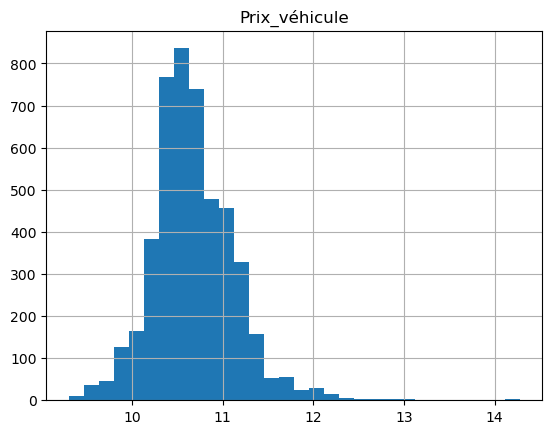

In [74]:
df["Prix_véhicule"].hist(bins = 30)
plt.title("Prix_véhicule");

In [75]:
cat

['Marque',
 'Modèle',
 'Groupe',
 'Energie',
 'Carrosserie',
 'Gamme',
 'Type_de_boite',
 'Bonus-Malus',
 'Energie_simple']

In [76]:
#I try the same without dropping Modèle variable and the MAE decrease from around 0.02 that's quite but in the real life
#it doesn't make sense to know the name of the model we want to build and it shouldn't have influence on the price
df.drop("Modèle",axis=1, inplace= True)

In [77]:
#transform categorical into dummies
cat.remove("Modèle")
for col in  cat:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)

In [78]:
df

,Cylindrée,Puissance_fiscale,Puissance_maximale,Puissance_nominale_électrique,Poids_à_vide,Rapport_poids-puissance,Nombre_rapports,Conso_basse_vitesse_Min,Conso_basse_vitesse_Max,Conso_moyenne_vitesse_Min,Conso_moyenne_vitesse_Max,Conso_haute_vitesse_Min,Conso_haute_vitesse_Max,Conso_T-haute_vitesse_Min,Conso_T-haute_vitesse_Max,Conso_vitesse_mixte_Min,Conso_vitesse_mixte_Max,Conso_elec_Min,Conso_elec_Max,Autonomie_elec_Min,Autonomie_elec_Max,Autonomie_elec_urbain_Min,Autonomie_elec_urbain_Max,CO2_basse_vitesse_Min,CO2_basse_vitesse_Max,CO2_moyenne_vitesse_Min,CO2_moyenne_vitesse_Max,CO2_haute_vitesse_Min,CO2_haute_vitesse_Max,CO2_T-haute_vitesse_Min,CO2_T-haute_vitesse_Max,CO2_vitesse_mixte_Min,CO2_vitesse_mixte_Max,Essai_CO2_type_1,Essai_HC,Essai_Nox,Essai_HCNox,Essai_particules,Masse_OM_Min,Masse_OM_Max,Barème_Bonus-Malus,Prix_véhicule,Puissance,Marque_ALPINE,Marque_AUDI,Marque_BENTLEY,Marque_BMW,Marque_CITROEN,Marque_CUPRA,Marque_DACIA,Marque_DS,Marque_FERRARI,Marque_FIAT,Marque_FORD,Marque_HONDA,Marque_HYUNDAI,Marque_JAGUAR,Marque_JEEP,Marque_KIA,Marque_LAMBORGHIN,Marque_LAND ROVER,Marque_LEXUS,Marque_MASERATI,Marque_MAZDA,Marque_MERCEDES,Marque_MG,Marque_MINI,Marque_MITSUBISHI,Marque_NISSAN,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_RENAULT,Marque_ROLLS ROYCE,Marque_SEAT,Marque_SKODA,Marque_SMART,Marque_SSANGYONG,Marque_SUBARU,Marque_SUZUKI,Marque_TESLA,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO,Marque_nan,Groupe_DAIMLER,Groupe_FORD,Groupe_GEELY,Groupe_HONDA,Groupe_HYUNDAI,Groupe_MITSUBISHI,Groupe_NISSAN,Groupe_RENAULT,Groupe_SAIC,Groupe_SSANGYONG,Groupe_STELLANTIS,Groupe_SUZUKI,Groupe_TATA,Groupe_TESLA,Groupe_TOYOTA,Groupe_VOLKSWAGEN,Groupe_nan,Energie_ELEC+GAZOLE HR,Energie_ELECTRIC,Energie_ESS+ELEC HNR,Energie_ESS+G.P.L.,Energie_ESSENCE,Energie_GAZ NAT.VEH,Energie_GAZ+ELEC HNR,Energie_GAZOLE,Energie_SUPERETHANOL,Energie_nan,Carrosserie_BREAK,Carrosserie_CABRIOLET,Carrosserie_COMBISPACE,Carrosserie_COUPE,Carrosserie_MINIBUS,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,Carrosserie_nan,"Gamme_""MOYENNE SUPERIEURE""",Gamme_ECONOMIQUE,Gamme_INFERIEURE,Gamme_LUXE,Gamme_SUPERIEURE,Gamme_nan,Type_de_boite_MECANIQUE,Type_de_boite_VARIATION CONTINUE,Type_de_boite_VARIATION ELECTRIQUE,Type_de_boite_nan,Bonus-Malus_Bonus 1000,Bonus-Malus_Bonus 2000,Bonus-Malus_Bonus 4000,Bonus-Malus_Bonus 6000,Bonus-Malus_Malus,Bonus-Malus_Neutre 0,Bonus-Malus_nan,Energie_simple_ESSENCE,Energie_simple_GAZ NAT.VEH,Energie_simple_GAZOLE,Energie_simple_GPL,Energie_simple_HYBRIDE,Energie_simple_nan
0,1332.0,7.0,96.0,0.00,1519.0,0.06,7.0,8.461,9.020,6.372,7.204,5.681,6.695,6.990,8.845,6.656,7.871,0.0,0.0,0.0,0.0,0.0,0.0,191.87,204.52,144.41,163.26,128.69,151.70,158.44,200.55,150.86,178.42,0.234,0.012,0.022,0.000,0.001,1594.0,1594.0,1901.0,10.341742,96.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
1,0.0,6.0,0.0,80.90,1645.0,0.01,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,179.0,0.0,200.0,0.0,265.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,1720.0,1720.0,-6000.0,10.558673,80.90,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [79]:
#split explanatory and explained variables
X = df.drop('Prix_véhicule', axis=1)
y = df['Prix_véhicule']

In [80]:
#we need now to split our df and to standardize our variables values and then train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

0.9437730245540752
Mean absolute error 0.07183404391413543
R2 Score 0.9437730245540752


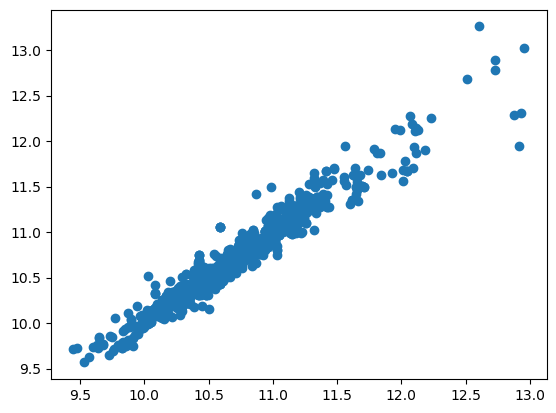

In [81]:
lm_model = make_pipeline(StandardScaler(), LinearRegression())
lm_model.fit(X_train, y_train) #Fit
        
#Predict using your model
y_test_preds = lm_model.predict(X_test)
    
#Score using your model
test_score = r2_score(y_test, y_test_preds)
print(test_score)
maeL=mean_absolute_error(y_test,y_test_preds)
scoreL=r2_score(y_test,y_test_preds)
print("Mean absolute error", maeL)
print("R2 Score", scoreL)
    
plt.scatter(y_test,y_test_preds)

0.9446434323889943
Mean absolute error 0.07155388475948372
R2 Score 0.9446434323889943


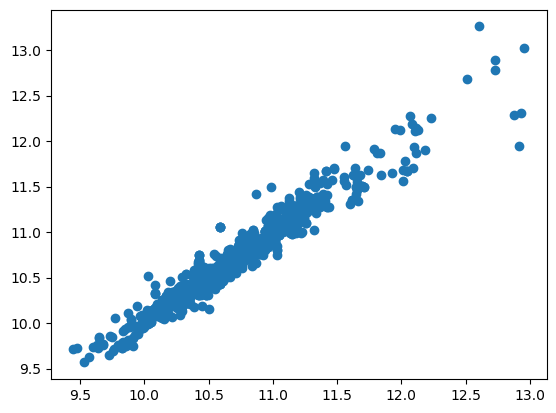

In [82]:
lm_modelR = make_pipeline(StandardScaler(), RidgeCV())
lm_modelR.fit(X_train, y_train) #Fit
        
#Predict using your model
y_test_predsR = lm_modelR.predict(X_test)
    
#Score using your model
test_score = r2_score(y_test, y_test_predsR)
print(test_score)
maeR=mean_absolute_error(y_test,y_test_predsR)
scoreR=r2_score(y_test,y_test_predsR)
print("Mean absolute error", maeR)
print("R2 Score", scoreR)
    
plt.scatter(y_test,y_test_preds)

0.9445269933517955
Mean absolute error 0.07160577777331346
R2 Score 0.9445269933517955


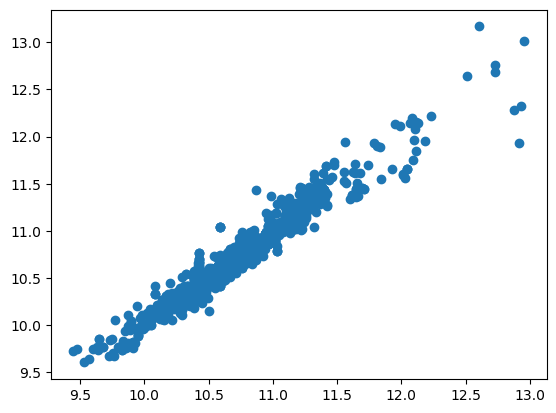

In [83]:
lm_model = make_pipeline(StandardScaler(), LassoCV())
lm_model.fit(X_train, y_train) #Fit
        
#Predict using your model
y_test_preds = lm_model.predict(X_test)
    
#Score using your model
test_score = r2_score(y_test, y_test_preds)
print(test_score)
maeLA=mean_absolute_error(y_test,y_test_preds)
scoreLA=r2_score(y_test,y_test_preds)
print("Mean absolute error", maeLA)
print("R2 Score", scoreLA)
    
plt.scatter(y_test,y_test_preds)

In [84]:
print(f"The Mean Absolute Error of Linear Regression model is {maeL} and the R2 is {scoreL}")
print(f"The Mean Absolute Error of Ridge Regression model is {maeR} and the R2 is {scoreR}")
print(f"The Mean Absolute Error of LASSO Regression model is {maeLA} and the R2 is {scoreLA}")

The Mean Absolute Error of Linear Regression model is 0.07183404391413543 and the R2 is 0.9437730245540752
The Mean Absolute Error of Ridge Regression model is 0.07155388475948372 and the R2 is 0.9446434323889943
The Mean Absolute Error of LASSO Regression model is 0.07160577777331346 and the R2 is 0.9445269933517955


# Prediction<a id="prediction1"></a>

Let's say we build a new car with certain features and now we want to find the price based on other car on the french market. We will ise the Ridge CV regression as it has the smallest MEA.